<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/HM/NeuronsNetwork_HMclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://drive.google.com/file/d/1vdh_ICQD1QBwOYkFMMrea_6kO4GYLDR8/view?usp=sharing
!gdown 1vdh_ICQD1QBwOYkFMMrea_6kO4GYLDR8
!unzip "HM_items_classification.zip" -d "/content/HM_items_classification"

Streaming output truncated to the last 5000 lines.
  inflating: /content/HM_items_classification/test/bag/0553055001.jpg  
  inflating: /content/HM_items_classification/test/bag/0553317001.jpg  
  inflating: /content/HM_items_classification/test/bag/0560783021.jpg  
  inflating: /content/HM_items_classification/test/bag/0566564002.jpg  
  inflating: /content/HM_items_classification/test/bag/0569244002.jpg  
  inflating: /content/HM_items_classification/test/bag/0569246008.jpg  
  inflating: /content/HM_items_classification/test/bag/0569246011.jpg  
  inflating: /content/HM_items_classification/test/bag/0575923001.jpg  
  inflating: /content/HM_items_classification/test/bag/0592272001.jpg  
  inflating: /content/HM_items_classification/test/bag/0596006003.jpg  
  inflating: /content/HM_items_classification/test/bag/0599832002.jpg  
  inflating: /content/HM_items_classification/test/bag/0601282002.jpg  
  inflating: /content/HM_items_classification/test/bag/0601730002.jpg  
  inflating: 

In [ ]:
512*2

1024

In [ ]:
# @title ANN 1hidden layer
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(227, 227, 3)),
    tf.keras.layers.Dense(1024,  activation='sigmoid'),
    tf.keras.layers.Dense(512,  activation='sigmoid'),
    tf.keras.layers.Dense(256,  activation='sigmoid'),
    tf.keras.layers.Dense(128,  activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 154587)            0         
                                                                 
 dense (Dense)               (None, 1024)              158298112 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 158988426 (606.49 MB)
Trainable params: 15

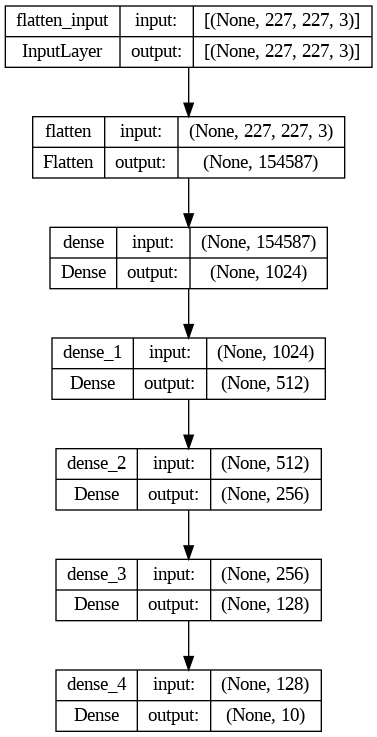

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='ANN.png', show_shapes=True, show_layer_names=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 3.6 MB/s eta 0:00:00


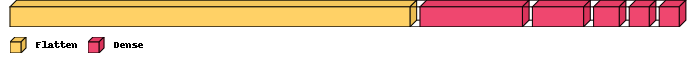

In [ ]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True)

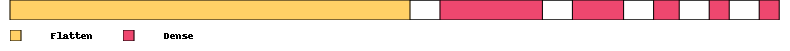

In [ ]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

In [ ]:
BATCH_SIZE = 32
#Start
batch_size = 32

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train = ImageDataGenerator(rescale=1/255, validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dir = '/content/HM_items_classification/train'
test_dir = '/content/HM_items_classification/test'
# Create the training data generator
train_dataset = train.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="rgb",
    subset='training'  # Specify the subset as 'training' for the training set
)

# Create the validation data generator
val_dataset = train.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="rgb",
    subset='validation'  # Specify the subset as 'validation' for the validation set
)
test_dataset = test.flow_from_directory(test_dir, target_size=(227, 227),batch_size=batch_size, class_mode = 'categorical', color_mode="rgb")

Found 3204 images belonging to 10 classes.
Found 796 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
import math
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(227, 227, 3)),
    tf.keras.layers.Dense(1024,  activation='relu'),
    tf.keras.layers.Dense(512,  activation='relu'),
    tf.keras.layers.Dense(256,  activation='relu'),
    tf.keras.layers.Dense(128,  activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epoch = 200

from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'lenet5_epoch_{epoch:02d}.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_weights_only=True,
                                   period=50,  # Save weights every 50 epochs
                                   verbose=1)
import time
# get the start time
st = time.time()
history = model.fit(train_dataset, epochs=epoch,
                    steps_per_epoch=len(train_dataset),
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset),
                    callbacks=[model_checkpoint],
                    verbose=True)


print('Execution time:', time.time() - st, 'seconds')

Epoch 1/200
101/101 [==============================] - 9s 78ms/step - loss: 2.8819 - accuracy: 0.1698 - val_loss: 2.3528 - val_accuracy: 0.1344
Epoch 2/200
101/101 [==============================] - 9s 87ms/step - loss: 2.0649 - accuracy: 0.2413 - val_loss: 2.3243 - val_accuracy: 0.1683
Epoch 3/200
101/101 [==============================] - 7s 74ms/step - loss: 1.8741 - accuracy: 0.3240 - val_loss: 1.7255 - val_accuracy: 0.3857
Epoch 4/200
101/101 [==============================] - 8s 83ms/step - loss: 1.7301 - accuracy: 0.3892 - val_loss: 1.6486 - val_accuracy: 0.4133
Epoch 5/200
101/101 [==============================] - 9s 90ms/step - loss: 1.6077 - accuracy: 0.4267 - val_loss: 1.5691 - val_accuracy: 0.4573
Epoch 6/200
101/101 [==============================] - 7s 74ms/step - loss: 1.5352 - accuracy: 0.4625 - val_loss: 1.7267 - val_accuracy: 0.3832
Epoch 7/200
101/101 [==============================] - 9s 86ms/step - loss: 1.4637 - accuracy: 0.4750 - val_loss: 1.4109 - val_accuracy:

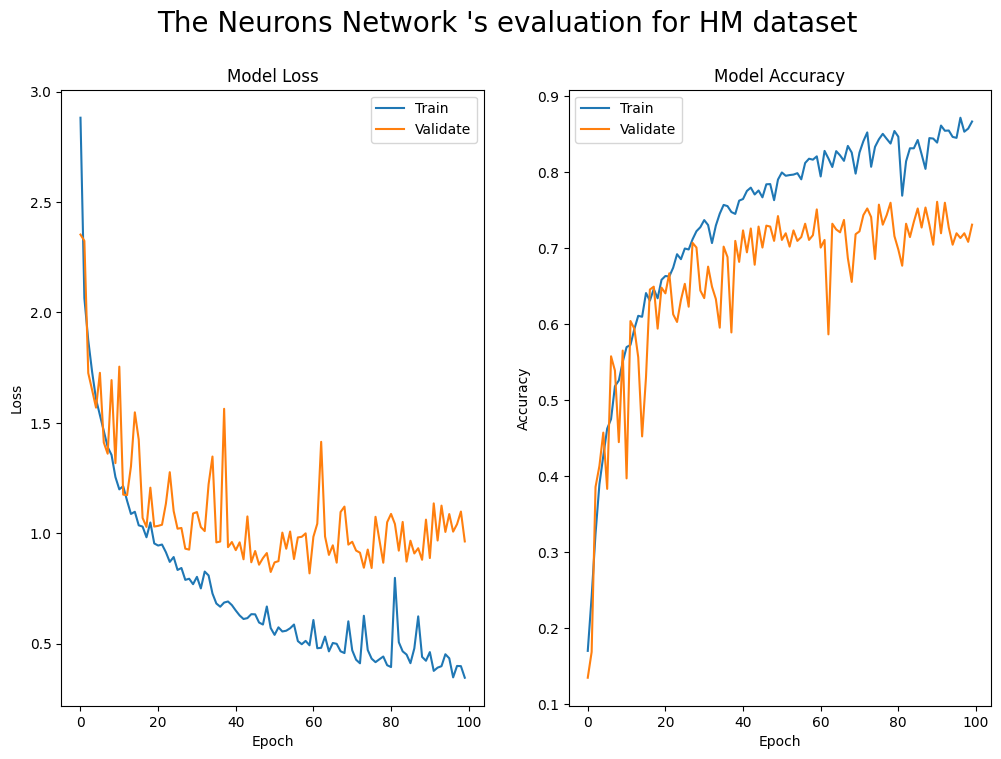

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("The Neurons Network 's evaluation for HM dataset ",fontsize=20)
axes[0].plot(history.history['loss'][:100])
axes[0].plot(history.history['val_loss'][:100])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Validate'])


axes[1].plot(history.history['accuracy'][:100])
axes[1].plot(history.history['val_accuracy'][:100])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Validate'])
plt.show()


import json

# Convert and write JSON object to file
with open("200epoch_ann_HM.json", "w") as outfile:
    json.dump(history.history, outfile)

<ipython-input-34-41cd0d973443>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_dataset)


<Figure size 1000x300 with 0 Axes>

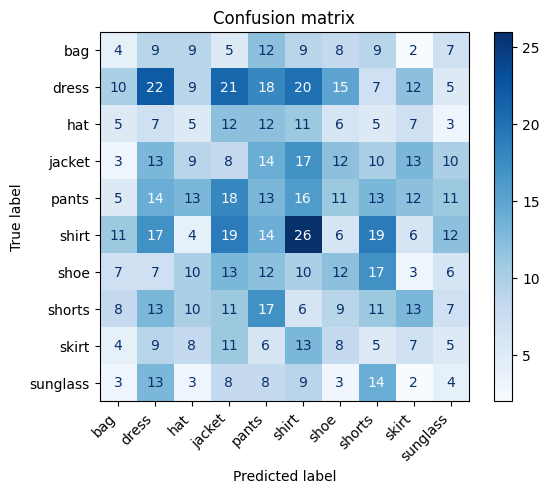

              precision    recall  f1-score   support

         bag       0.07      0.05      0.06        74
       dress       0.18      0.16      0.17       139
         hat       0.06      0.07      0.07        73
      jacket       0.06      0.07      0.07       109
       pants       0.10      0.10      0.10       126
       shirt       0.19      0.19      0.19       134
        shoe       0.13      0.12      0.13        97
      shorts       0.10      0.10      0.10       105
       skirt       0.09      0.09      0.09        76
    sunglass       0.06      0.06      0.06        67

    accuracy                           0.11      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.11      0.11      0.11      1000

0.112
0.11263739987966484


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

Y_pred = model.predict_generator(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)
class_names = list(train_dataset.class_indices.keys())

disp = ConfusionMatrixDisplay.from_predictions(
    test_dataset.classes, y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()


from sklearn.metrics import classification_report
class_names = list(train_dataset.class_indices.keys())
print(classification_report(test_dataset.classes, y_pred, target_names=class_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(test_dataset.classes, y_pred))
from sklearn.metrics import f1_score
print(f1_score(test_dataset.classes, y_pred, average='weighted'))